In [17]:
# In this code we use Classical Computing Gaussian Naive Bayes Algorithm on Nasa Nearst Earth Object Data Set
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statistics as st
from sklearn.metrics import recall_score, precision_score, confusion_matrix
import math
import seaborn as samandar

In [18]:
# Loaded the Dataset
data = pd.read_csv('neo_v2.csv')

In [19]:
# Lets drop unwated attributes such as Orbiting Body and Name
data = data.drop("orbiting_body", axis = 1)
data = data.drop("name", axis = 1)
data = data.drop("sentry_object", axis = 1)
data = data.drop("id", axis = 1)

In [20]:
# Splitted the Dataset into Training and Testing
train_input, test_input = train_test_split(data, test_size=0.3, random_state=0)

In [21]:
# Printing the Number of True and False Records in Train and Test Dataset
print("Train Dataset: No of True: {}, No. False: {}".format(len(train_input[train_input['hazardous'] == True]), len(train_input[train_input['hazardous'] == False])))
print("Test Dataset: No of True: {}, No. False: {}".format(len(test_input[test_input['hazardous'] == True]), len(test_input[test_input['hazardous'] == False])))


Train Dataset: No of True: 6183, No. False: 57402
Test Dataset: No of True: 2657, No. False: 24594


In [22]:
# Printing Number of records in training and testing
print("There are {} Training Records and {} Testing Records".format(train_input.shape[0], test_input.shape[0]))


There are 63585 Training Records and 27251 Testing Records


In [23]:
# Calculating Probability of Hazardious true And false
p_hazard_true = len(train_input[train_input['hazardous'] == True])/len(train_input)
p_hazard_false = len(train_input[train_input['hazardous'] == False])/len(train_input)

In [24]:
# Printing the target class probility
print("P[True]: {:.3f}".format(p_hazard_true))
print("P[False]: {:.3f}".format(p_hazard_false))


P[True]: 0.097
P[False]: 0.903


In [25]:
# Calculating probabilities for Hazardous = True
row1 = []
# Calculating Mean and variance for est_diameter_min for hazardous = true
row1.append(st.mean(train_input[train_input['hazardous'] == True]['est_diameter_min']))
row1.append(st.variance(train_input[train_input['hazardous'] == True]['est_diameter_min']))
row1.append(st.mean(train_input[train_input['hazardous'] == True]['est_diameter_max']))
row1.append(st.variance(train_input[train_input['hazardous'] == True]['est_diameter_max']))
row1.append(st.mean(train_input[train_input['hazardous'] == True]['relative_velocity']))
row1.append(st.variance(train_input[train_input['hazardous'] == True]['relative_velocity']))
row1.append(st.mean(train_input[train_input['hazardous'] == True]['miss_distance']))
row1.append(st.variance(train_input[train_input['hazardous'] == True]['miss_distance']))
row1.append(st.mean(train_input[train_input['hazardous'] == True]['absolute_magnitude']))
row1.append(st.variance(train_input[train_input['hazardous'] == True]['absolute_magnitude']))

# Calculating Probabilities for Hazardous = False
row2 = []
# Calculating Mean and variance for est_diameter_min for hazardous = false
row2.append(st.mean(train_input[train_input['hazardous'] == False]['est_diameter_min']))
row2.append(st.variance(train_input[train_input['hazardous'] == False]['est_diameter_min']))
row2.append(st.mean(train_input[train_input['hazardous'] == False]['est_diameter_max']))
row2.append(st.variance(train_input[train_input['hazardous'] == False]['est_diameter_max']))
row2.append(st.mean(train_input[train_input['hazardous'] == False]['relative_velocity']))
row2.append(st.variance(train_input[train_input['hazardous'] == False]['relative_velocity']))
row2.append(st.mean(train_input[train_input['hazardous'] == False]['miss_distance']))
row2.append(st.variance(train_input[train_input['hazardous'] == False]['miss_distance']))
row2.append(st.mean(train_input[train_input['hazardous'] == False]['absolute_magnitude']))
row2.append(st.variance(train_input[train_input['hazardous'] == False]['absolute_magnitude']))


In [26]:
calculated_fields = pd.DataFrame([row1,row2], columns= ['Mean_est_diameter_min','Var_est_diameter_min', 'Mean_est_diameter_max','Var_est_diameter_max', 'Mean_relative_velocity','Var_relative_velocity', 'Mean_miss_distance', 'Var_miss_distance', 'Mean_absolute_magnitude', 'Var_absolute_magnitude'])

# Saving the Calculated fields to get a better view
calculated_fields.to_csv('calculated_fields.csv')

In [27]:
# Calculating Posterior Probability Function F(x) = (1/2πσ2)e(-(x-x̄)/2σ2)
def post_prob(mean, var, input_x):
    return ((1.0/math.sqrt(2.0*np.pi*var))*math.exp((-1.0*((input_x-mean)**2.0))/(2.0*var)))


In [28]:
# Writing the Estimation function:
def cnb(input):
    # Post_T = (p_hazard_true*def()*)
    Post_T = p_hazard_true
    Post_F = p_hazard_false
    # print("For Hazardous = True")
    # Calculating Posterior Probability for Hazardous = True
    for i in range(len(input)-1):
        t1 = i*2
        t2 = t1+1
        val = post_prob(calculated_fields.iloc[0,t1],calculated_fields.iloc[0,t2], input[i])
        # print(val)
        # print("Post_T: {}".format(Post_T))
        Post_T *= val
    
    # print("For hazardous = False")
    # Calculating Posterior Probability for Hazardous = False
    for i in range(len(input)-1):
        t1 = i*2
        t2 = t1+1
        val = post_prob(calculated_fields.iloc[1,t1],calculated_fields.iloc[1,t2], input[i])
        # print(val)
        # print("Post_F: {}".format(Post_F))
        Post_F *= val
    
    # print("Posterior Probability for Hazardous = True is: {}".format(Post_T))
    # print("Posterior Probability for Hazardous = False is: {}".format(Post_F))

    if Post_T > Post_F:
        return True
    else:
        return False

In [29]:
# Specificity
def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+ matrix[0][1]) if (matrix[0][0]+matrix[0][1]>0) else 0

# Negative Predictive Value(NPV)
def npv(matrix):
    return matrix[0][0]/(matrix[0][1]+ matrix[1][0]) if (matrix[0][1]+ matrix[1][0] > 0) else 0

# Logic for testing the algorithm
actual_outputs = test_input['hazardous']

predicted_outputs = []

for i in range(len(test_input)):
    predicted_outputs.append(cnb(test_input.iloc[i].values.flatten().tolist()))

In [30]:
# Creating Classifier Report function
def classifier_report():
    name = 'Classical Guassian Naive Bayes Algorithm'
    cr_prediction = predicted_outputs
    labels = actual_outputs 
    cr_cm = confusion_matrix(labels, cr_prediction)


    print("Confusion Matrix")
    print(cr_cm)

    cr_precision = precision_score(labels, cr_prediction)
    cr_recall = recall_score(labels, cr_prediction)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25 * (cr_precision + cr_recall + cr_specificity + cr_npv)

    print('The precision score of the {} classifier is {:.2f}'
        .format(name, cr_precision))
    print('The recall score of the {} classifier is {:.2f}'
        .format(name, cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'
        .format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'
        .format(name, cr_npv))
    print('The information level is: {:.2f}'
        .format(cr_level))
    
classifier_report()


Confusion Matrix
[[22218  2376]
 [ 1716   941]]
The precision score of the Classical Guassian Naive Bayes Algorithm classifier is 0.28
The recall score of the Classical Guassian Naive Bayes Algorithm classifier is 0.35
The specificity score of the Classical Guassian Naive Bayes Algorithm classifier is 0.90
The npv score of the Classical Guassian Naive Bayes Algorithm classifier is 5.43
The information level is: 1.74


<Axes: >

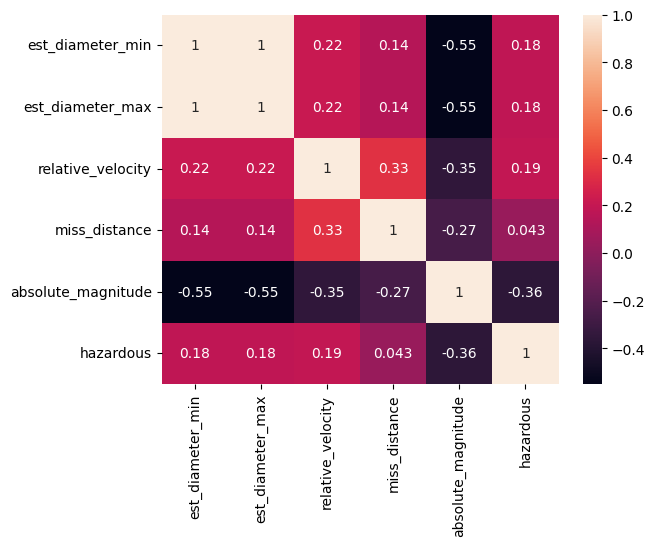

In [31]:
# Visualisation
correlation = train_input.corr()

# plot the heatmap
samandar.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot=True)

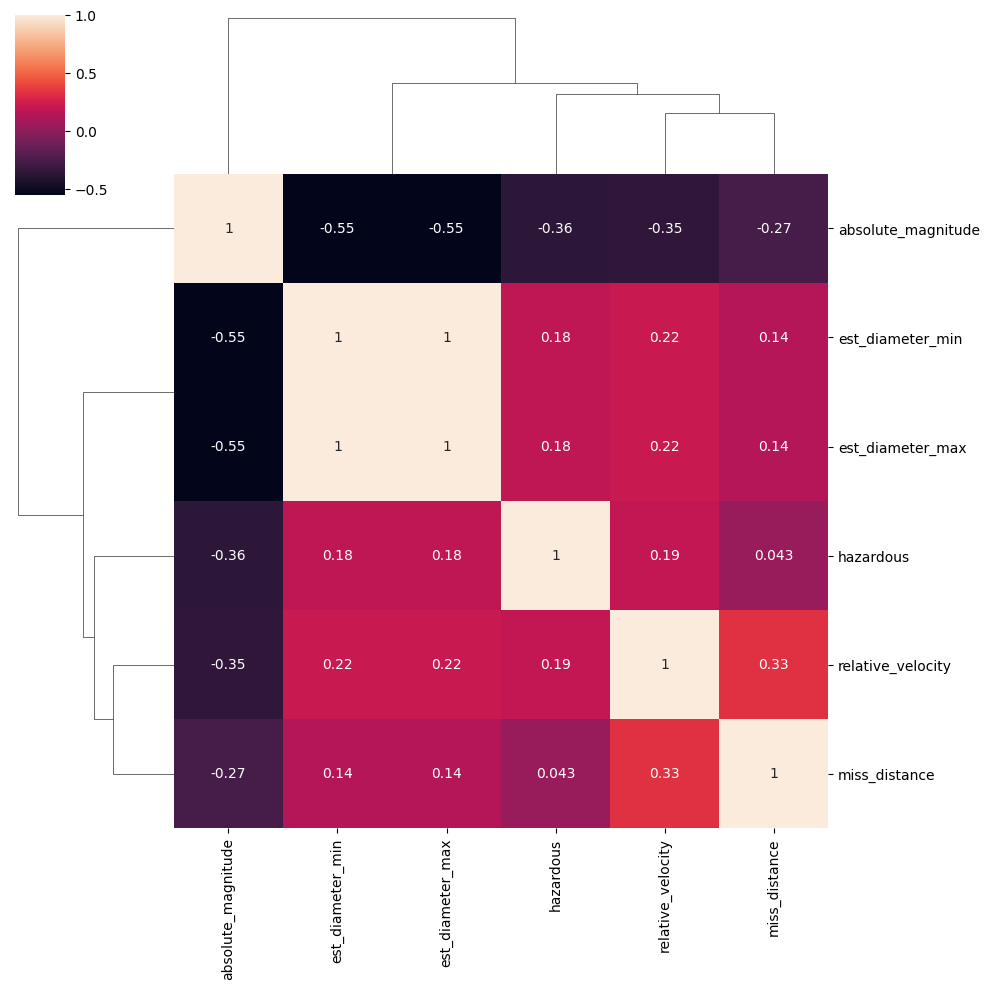

In [32]:
# plot the clustermap
samandar.clustermap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot=True)
